In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Linux
# !pip install underthesea --python=python3.11
!pip install underthesea
!pip install transformers

In [2]:
from underthesea import word_tokenize

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from transformers import AutoModel, AutoTokenizer

import matplotlib.pyplot as plt
import re

# **Gộp thể loại**

In [4]:
# df = pd.read_csv('../data/cleaned_data.csv')
df = pd.read_csv('/content/drive/MyDrive/data/cleaned_data.csv')
df.head()

,URL,Title,Abstract,Content,Category,num_words
0,https://vnexpress.net/biet-thu-lien-ke-duoi-5-...,biệt thự liền kề dưới 5 tỷ sẽ dần khan hiếm b...,tp hcm hai năm tới thành phố có thể không còn ...,trong báo cáo thị trường mới đây hãng tư vấn d...,bất động sản,600
1,https://tuoitre.vn/nha-dau-tu-hai-long-khi-tai...,nhà đầu tư hài lòng khi tài sản cho thuê được ...,trở về từ chuyến khảo sát phú quốc chị thu tra...,nắm bắt cơ hội đầu tư hơn 2 năm nay tôi đầu tư...,bất động sản,755
2,https://tuoitre.vn/tinh-nghe-an-noi-gi-ve-du-a...,tỉnh nghệ an nói gì về dự án công viên nghĩa t...,tto đây là công viên nghĩa trang sinh thái vĩ...,ngày 3112 ubnd tỉnh nghệ an có thông tin tới c...,bất động sản,507
3,https://tuoitre.vn/hang-xom-chung-cu-lexington...,hàng xóm chung cư lexington cũng chưa có sổ vì...,cư dân ở chung cư petrovietnam landmark tp thủ...,theo tìm hiểu củatuổi trẻ online dự án đường l...,bất động sản,673
4,https://tuoitre.vn/uc-doi-mat-cuoc-khung-hoang...,úc đối mặt cuộc khủng hoảng nhà cho thuê tồi t...,giá cho thuê nhà tăng mạnh đã và đang ảnh hưởn...,theo phóng viên ttxvn tại sydney báo cáo về kh...,bất động sản,559


# **Phân đoạn văn bản**

In [6]:
def segmented_text(text):
    return word_tokenize(text, format="text")

In [ ]:
cols = ['Title', 'Abstract', 'Content']
df[cols] = df[cols].astype(str)
df[cols] = df[cols].apply(lambda col: col.apply(segmented_text))
df.sample(5)

,URL,Title,Abstract,Content,Category,num_words
98781,https://thanhnien.vn/ket-qua-xo-so-kqxs-truc-t...,kết_quả xổ_số kqxs trực_tiếp nhanh hôm_nay thứ...,xem kết_quả xổ_số kqxs miền bắc xsmb kết_quả x...,giải bảy giải sáu giải năm giải tư_giải ba giả...,đời sống,42
44252,https://thanhnien.vn/bien-doi-khi-hau-co-the-g...,biến_đổi khí_hậu có_thể gây thiệt_hại 12 sản_l...,tno ngân_hàng thế_giới wb tại việt_nam hôm_nay...,báo_cáo phân_tích những rủi_ro thời_tiết nguy_...,kinh tế,368
21000,https://thanhnien.vn/kim-tuyen-doan-minh-tai-l...,kim tuyến đoàn minh_tài làm giám_khảo cuộc thi...,kim tuyến và đoàn minh_tài cảm_thấy cuộc thi l...,media24h là cuộc thi thử_thách các nhà làm trẻ...,giải trí,278
97510,https://dulich.tuoitre.vn/80-khach-du-lich-bay...,80 khách du_lịch bay thẳng từ ấn_độ đến phú_quốc,tto sáng 99 ông bùi_quốc_thái giám_đốc sở du_l...,theo ông thái kể từ dịch_bệnh covid19 đây là đ...,đời sống,200
12587,https://vnexpress.net/de-xuat-khong-cong-bo-di...,đề_xuất không công_bố điểm chuẩn xét_tuyển sớm...,để học_sinh không lơ_là học_tập trường đại_học...,ông huỳnh_văn_chương cục trưởng quản_lý chất_l...,giáo dục,507


In [ ]:
df = df.drop('num_words', axis=1)
df.to_csv('/content/drive/MyDrive/data/segmented_data.csv', index=False, encoding='utf-8')
# df.to_csv('../data/segmented_data.csv', index=False, encoding='utf-8')

# **Train/validation/test**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/segmented_data.csv')
df.sample(5)

,URL,Title,Abstract,Content,Category
56751,https://tuoitre.vn/giet-nguoi-vi-bi-noi-lai-xe...,​ giết người vì bị nói lái_xe ẩu,tto mâu_thuẫn khi chạy xe và bị chê lái_xe ẩu ...,sáng 119 tand tỉnh đồng_tháp đã mở phiên tòa x...,pháp luật
100359,https://thanhnien.vn/cac-be-gai-trong-ca-sinh-...,các bé gái trong ca sinh 4 được chăm_sóc như_t...,mỗi em bé ra_đời để được nuôi_dưỡng chăm_sóc c...,vậy trong hoàn_cảnh nghèo_khó và con lớn vẫn c...,đời sống
39939,https://thanhnien.vn/fifa-online-3-ra-mat-ung-...,fifa online 3 ra_mắt ứng_dụng thiết_kế ảnh hài...,bạn nghĩ sao nếu được sở_hữu một công_cụ chế_t...,chỉ với một_số thao_tác đơn_giản không mất đến...,khoa học
6828,https://tuoitre.vn/masterise-homes-khai-truong...,masterise homes khai_trương khu căn_hộ hàng hi...,tòa lake tòa tháp đầu_tiên của grand marina sa...,sự_kiện khai_trương này có sự tham_gia của lãn...,bất động sản
90900,https://thanhnien.vn/hyundai-custin-giam-gia-7...,hyundai custin giảm_giá 75 triệu tăng lực cạnh...,hyundai custin đang được nhiều đại_lý giảm_giá...,theo đó các mẫu xe hyundai custin được giảm_gi...,xe


Chia tỉ lệ 60/20/20

In [22]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Category'])
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42, stratify=val_df['Category'])

train_path = '/content/drive/MyDrive/data/splitting/train.csv'
val_path = '/content/drive/MyDrive/data/splitting/val.csv'
test_path = '/content/drive/MyDrive/data/splitting/test.csv'

train_df.to_csv(train_path, index=False, encoding='utf-8')
val_df.to_csv(val_path, index=False, encoding='utf-8')
test_df.to_csv(test_path, index=False, encoding='utf-8')

# **Tokenization**

Khởi tạo

In [23]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2", use_fast=False)

Tokenize cho ba tập dữ liệu

In [24]:
def tokenize_dataframe(df, columns):
    tokenized_df = df.copy()
    for col in columns:
        tokenized_df[col] = tokenized_df[col].apply(lambda text: tokenizer.tokenize(text))
    return tokenized_df

cols = ['Title', 'Abstract', 'Content']

- `train_df`

In [25]:
train_df[cols] = train_df[cols].astype(str)
tokenized_train_df = tokenize_dataframe(train_df, cols)

Phân bố số lượng token

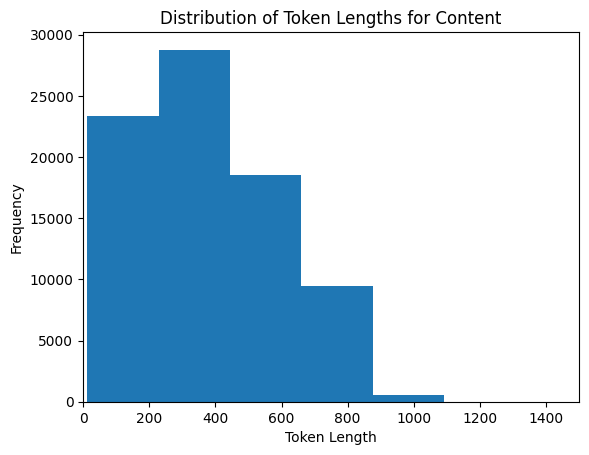

In [26]:
token_lengths = np.vectorize(len)(tokenized_train_df['Content'].values)
plt.hist(token_lengths, bins=10)

plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths for Content')

plt.xlim(0, 1500)

plt.show()

In [27]:
tokenizer.save_pretrained("/content/drive/MyDrive/data/tokenizer/train/")

('/content/drive/MyDrive/data/tokenizer/train/tokenizer_config.json',
 '/content/drive/MyDrive/data/tokenizer/train/special_tokens_map.json',
 '/content/drive/MyDrive/data/tokenizer/train/vocab.txt',
 '/content/drive/MyDrive/data/tokenizer/train/bpe.codes',
 '/content/drive/MyDrive/data/tokenizer/train/added_tokens.json')

- `valid_df`

In [28]:
val_df[cols] = val_df[cols].astype(str)
tokenized_val_df = tokenize_dataframe(val_df, cols)

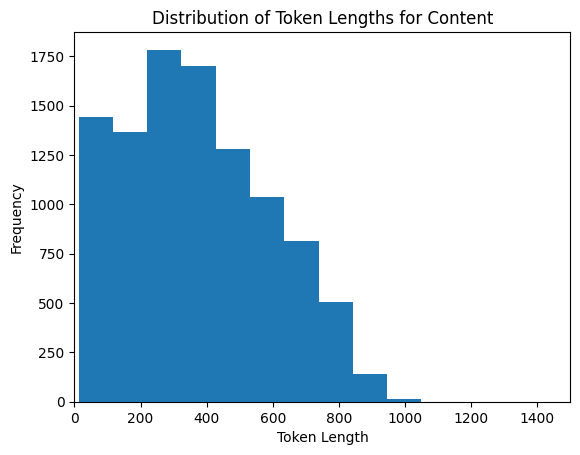

In [29]:
token_lengths = np.vectorize(len)(tokenized_val_df['Content'].values)
plt.hist(token_lengths, bins=10)

plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths for Content')

plt.xlim(0, 1500)

plt.show()

In [30]:
tokenizer.save_pretrained("/content/drive/MyDrive/data/tokenizer/valid/")

('/content/drive/MyDrive/data/tokenizer/valid/tokenizer_config.json',
 '/content/drive/MyDrive/data/tokenizer/valid/special_tokens_map.json',
 '/content/drive/MyDrive/data/tokenizer/valid/vocab.txt',
 '/content/drive/MyDrive/data/tokenizer/valid/bpe.codes',
 '/content/drive/MyDrive/data/tokenizer/valid/added_tokens.json')

- `test_df`

In [31]:
test_df[cols] = test_df[cols].astype(str)
tokenized_test_df = tokenize_dataframe(test_df, cols)

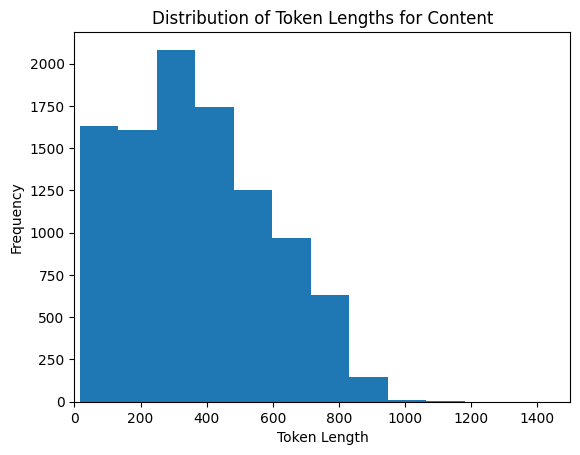

In [32]:
token_lengths = np.vectorize(len)(tokenized_test_df['Content'].values)
plt.hist(token_lengths, bins=10)

plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths for Content')

plt.xlim(0, 1500)

plt.show()

In [33]:
tokenizer.save_pretrained("/content/drive/MyDrive/data/tokenizer/test/")

('/content/drive/MyDrive/data/tokenizer/test/tokenizer_config.json',
 '/content/drive/MyDrive/data/tokenizer/test/special_tokens_map.json',
 '/content/drive/MyDrive/data/tokenizer/test/vocab.txt',
 '/content/drive/MyDrive/data/tokenizer/test/bpe.codes',
 '/content/drive/MyDrive/data/tokenizer/test/added_tokens.json')